# Linnear Regression on Geometric mean of drug weights

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("weight_synergy.csv").dropna(subset=['synergy', 'weightGeometricMean', 'combinedWeight', ])

X = df[['weightGeometricMean', 'combinedWeight']]  
y = df['synergy']             

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict synergy scores on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model R²: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Extract the model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Coefficient (Slope): {coefficient:.2f}")


Model R²: 0.03
Mean Squared Error: 34.70
Intercept: -2.68
Coefficient (Slope): 0.02


Guessed correctly: 29537
Guessed wrongly: 21003
Success rate: 58.44281757024139 %


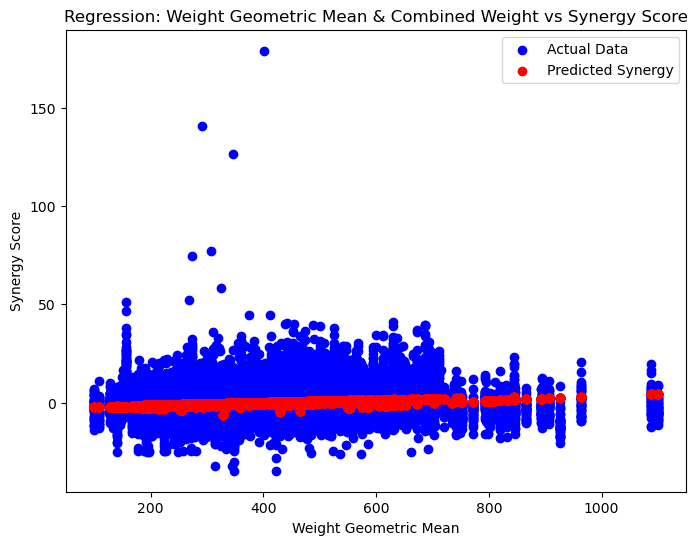

In [9]:
counter = {True: 0, False: 0}

for i in range(len(df)):
    # Get the feature values and actual synergy value for the selected row
    geom_mean_example = df["weightGeometricMean"].iloc[i]
    combined_weight_example = df["combinedWeight"].iloc[i]
    actual_synergy = df["synergy"].iloc[i]

    # Predict the synergy using the model (now using both features)
    predicted_synergy = model.predict(pd.DataFrame([[geom_mean_example, combined_weight_example]], 
                                                   columns=["weightGeometricMean", "combinedWeight"]))[0]  # Extract the scalar value

    # Convert predicted and actual synergy scores to binary (0 or 1)
    predicted_binary = predicted_synergy > 0
    actual_binary = actual_synergy > 0

    # Update the counter based on whether the prediction matches the actual value
    counter[predicted_binary == actual_binary] += 1

print("Guessed correctly:", counter[True])
print("Guessed wrongly:", counter[False])
print("Success rate:", counter[True] / (counter[True] + counter[False]) * 100, "%")